In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

chrome_options = Options()
chrome_options.add_argument("--headless") 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
driver.get('https://www.meteoblue.com/pt/tempo/14-dias/juiz-de-fora_brasil_3459505')

time.sleep(3)

dates = driver.find_elements(By.XPATH, "//span[substring(text(), 4, 1) = ',']")
temperatures = driver.find_elements(By.XPATH, "//span[contains(text(), '°C')]")

max_temps = []
min_temps = []
dates_list = []

for date, temp in zip(dates[0:8], temperatures[1:9]):  # Pula a primeira data e temperatura e pega as próximas 8
    max_temp, min_temp = temp.text.split(' / ')
    max_temps.append(int(max_temp.strip().replace("°C", "")))
    min_temps.append(int(min_temp.strip().replace("°C", "")))
    dates_list.append(date.text.strip())

# Fecha o driver
driver.quit()

print('ok')

ok


In [ ]:
print(f"{'Data':<12} {'Máx (°C)':<10} {'Mín (°C)':<10}")
print("-" * 32)
for date, max_temp, min_temp in zip(dates_list, max_temps, min_temps):
    print(f"{date:<18} {max_temp:<10} {min_temp:<15}")

Data         Máx (°C)   Mín (°C)  
--------------------------------
Thu, Oct 24        29         21             
Fri, Oct 25        31         20             
Sat, Oct 26        30         20             
Sun, Oct 27        23         18             
Mon, Oct 28        19         18             
Tue, Oct 29        19         17             
Wed, Oct 30        24         17             
Thu, Oct 31        25         16             


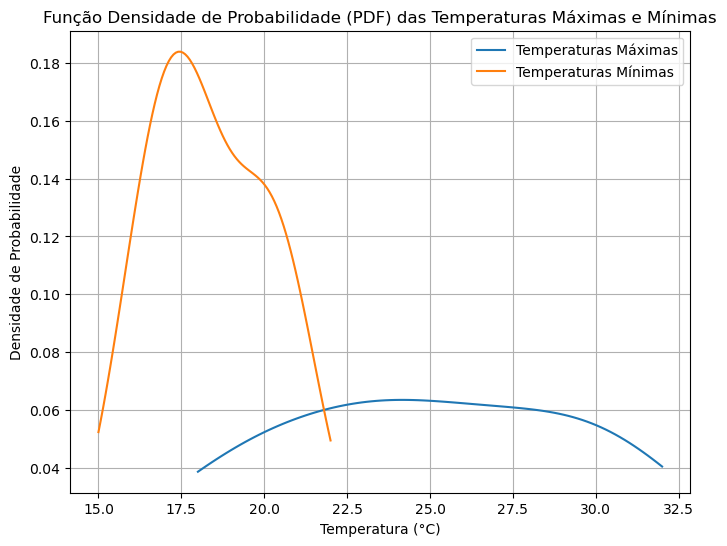

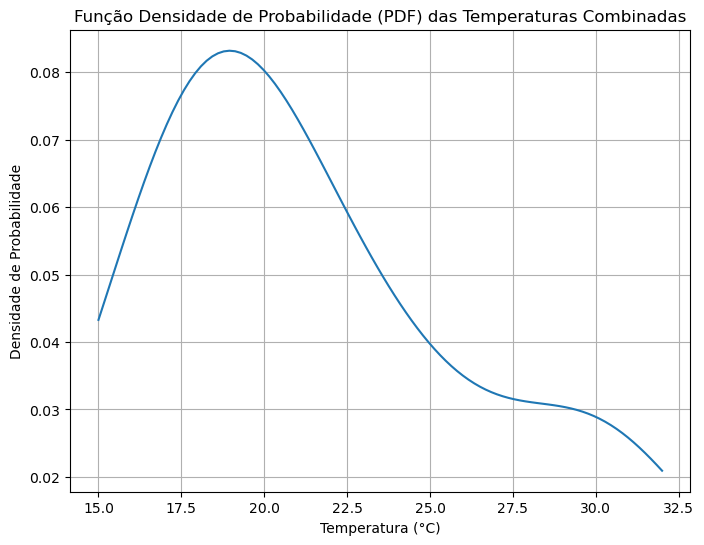

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_pdf(data, label):
    density = gaussian_kde(data)
    xs = np.linspace(min(data)-1, max(data)+1, 100)
    plt.plot(xs, density(xs), label=label)

plt.figure(figsize=(8, 6))
plot_pdf(max_temps, 'Temperaturas Máximas')
plot_pdf(min_temps, 'Temperaturas Mínimas')

plt.title('Função Densidade de Probabilidade (PDF) das Temperaturas Máximas e Mínimas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

temperaturas_combinadas = max_temps + min_temps

plt.figure(figsize=(8, 6))
plot_pdf(temperaturas_combinadas, 'Temperaturas Combinadas')

plt.title('Função Densidade de Probabilidade (PDF) das Temperaturas Combinadas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()
